In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from keras.layers import Dense
from keras.layers import Input, LeakyReLU, ReLU, Softmax
from keras.models import Model
from keras.datasets.mnist import load_data
from numpy import reshape
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import keras
import tensorflow as tf
import random
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

2022-12-14 17:01:20.310026: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# from bayes_opt import BayesianOptimization

In [3]:
def set_seed(seed=1):
    tf.random.set_seed(seed)
    # optional
    # for numpy.random
    np.random.seed(seed)
    # for built-in random
    random.seed(seed)
    # for hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)

set_seed(333)

In [4]:
df = pd.read_excel("proxy_data.xlsx")
df

,yearmo,SENT,SENT_ORTH,pdnd,ripo,nipo,cefd,s,indpro,consdur,consnon,consserv,recess,employ,cpi
0,195801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.209700,NaN,NaN,NaN,1,52076,28.600000
1,195802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.778601,NaN,NaN,NaN,1,51576,28.600000
2,195803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.536100,NaN,NaN,NaN,1,51299,28.799999
3,195804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.212700,NaN,NaN,NaN,1,51027,28.900000
4,195805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.401300,NaN,NaN,NaN,0,50914,28.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,202202,2.057682,1.628397,-11.71,87.900002,34.0,1.11,0.13,102.998100,2116.399902,3660.000000,10859.400391,0,150458,283.700012
770,202203,1.809218,1.320065,-11.73,2.700000,14.0,-1.16,0.11,103.728600,2112.800049,3756.199951,10962.200195,0,150856,287.500000
771,202204,1.369180,0.905249,3.62,146.800003,17.0,1.57,0.11,104.522400,2146.500000,3732.300049,11032.400391,0,151224,289.100006
772,202205,1.246667,1.519253,6.97,6.400000,15.0,2.42,0.10,104.572899,2084.399902,3750.199951,11119.900391,0,151608,292.299988


In [5]:
ret = pd.read_excel('SPX_close.xlsx') \
                                    .set_index(['Dates']) \
                                    .T
for i in ret.index:
    ret.loc[i, 'year'] = i.year
    ret.loc[i,'month'] = i.month

ret

Dates,PX_LAST,year,month
1960-11-30,55.54,1960.0,11.0
1960-12-30,58.11,1960.0,12.0
1961-01-31,61.78,1961.0,1.0
1961-02-28,63.44,1961.0,2.0
1961-03-31,65.06,1961.0,3.0
...,...,...,...
2022-07-29,4130.29,2022.0,7.0
2022-08-31,3955.00,2022.0,8.0
2022-09-30,3585.62,2022.0,9.0
2022-10-31,3871.98,2022.0,10.0


In [6]:
ret['date'] = ret['year']*100 + ret['month']
ret['date'] = ret['date'].astype('int')
# ret.reset_index(['date'],
#                 drop=True
#                 )
ret

Dates,PX_LAST,year,month,date
1960-11-30,55.54,1960.0,11.0,196011
1960-12-30,58.11,1960.0,12.0,196012
1961-01-31,61.78,1961.0,1.0,196101
1961-02-28,63.44,1961.0,2.0,196102
1961-03-31,65.06,1961.0,3.0,196103
...,...,...,...,...
2022-07-29,4130.29,2022.0,7.0,202207
2022-08-31,3955.00,2022.0,8.0,202208
2022-09-30,3585.62,2022.0,9.0,202209
2022-10-31,3871.98,2022.0,10.0,202210


In [7]:
ret.index = ret['date']

In [8]:
ret

Dates,PX_LAST,year,month,date
date,,,,
196011,55.54,1960.0,11.0,196011
196012,58.11,1960.0,12.0,196012
196101,61.78,1961.0,1.0,196101
196102,63.44,1961.0,2.0,196102
196103,65.06,1961.0,3.0,196103
...,...,...,...,...
202207,4130.29,2022.0,7.0,202207
202208,3955.00,2022.0,8.0,202208
202209,3585.62,2022.0,9.0,202209


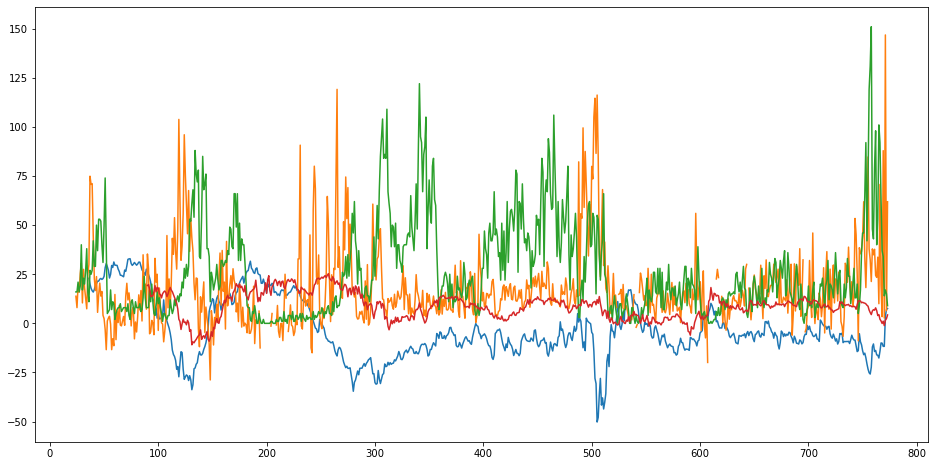

In [9]:
plt.subplots(figsize = (16, 8))
plt.plot(df.iloc[:,3:7]
            )

In [10]:
df

,yearmo,SENT,SENT_ORTH,pdnd,ripo,nipo,cefd,s,indpro,consdur,consnon,consserv,recess,employ,cpi
0,195801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.209700,NaN,NaN,NaN,1,52076,28.600000
1,195802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.778601,NaN,NaN,NaN,1,51576,28.600000
2,195803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.536100,NaN,NaN,NaN,1,51299,28.799999
3,195804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.212700,NaN,NaN,NaN,1,51027,28.900000
4,195805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.401300,NaN,NaN,NaN,0,50914,28.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,202202,2.057682,1.628397,-11.71,87.900002,34.0,1.11,0.13,102.998100,2116.399902,3660.000000,10859.400391,0,150458,283.700012
770,202203,1.809218,1.320065,-11.73,2.700000,14.0,-1.16,0.11,103.728600,2112.800049,3756.199951,10962.200195,0,150856,287.500000
771,202204,1.369180,0.905249,3.62,146.800003,17.0,1.57,0.11,104.522400,2146.500000,3732.300049,11032.400391,0,151224,289.100006
772,202205,1.246667,1.519253,6.97,6.400000,15.0,2.42,0.10,104.572899,2084.399902,3750.199951,11119.900391,0,151608,292.299988


In [11]:
proxy = df.set_index(['yearmo']) \
        .iloc[:,2:7] \
        .dropna()
proxy

,pdnd,ripo,nipo,cefd,s
yearmo,,,,,
196507,26.450001,35.299999,8.0,19.270000,0.14
196508,24.730000,28.000000,8.0,19.690001,0.14
196509,23.170000,-5.300000,17.0,17.580000,0.14
196510,21.010000,-4.400000,11.0,13.590000,0.13
196511,16.129999,1.500000,20.0,13.960000,0.14
...,...,...,...,...,...
202202,-11.710000,87.900002,34.0,1.110000,0.13
202203,-11.730000,2.700000,14.0,-1.160000,0.11
202204,3.620000,146.800003,17.0,1.570000,0.11


In [12]:
proxy.describe()

,pdnd,ripo,nipo,cefd,s
count,657.000000,657.000000,657.000000,657.000000,657.000000
mean,-6.310259,18.401020,27.837139,8.731294,0.164825
std,12.509511,20.271443,24.191045,6.685572,0.084946
min,-50.230000,-28.799999,1.000000,-10.910000,0.040000
25%,-13.190000,6.990000,10.000000,3.770000,0.100000
50%,-7.410000,13.800000,20.000000,9.190000,0.140000
75%,-1.250000,23.600000,39.000000,12.630000,0.210000
max,31.629999,146.800003,151.000000,25.280001,0.430000


In [16]:
comb = pd.concat([ret,proxy],
                axis=1
                ).dropna()

In [17]:
comb

,PX_LAST,year,month,date,pdnd,ripo,nipo,cefd,s
196507,85.25,1965.0,7.0,196507,26.450001,35.299999,8.0,19.270000,0.14
196508,87.17,1965.0,8.0,196508,24.730000,28.000000,8.0,19.690001,0.14
196509,89.96,1965.0,9.0,196509,23.170000,-5.300000,17.0,17.580000,0.14
196510,92.42,1965.0,10.0,196510,21.010000,-4.400000,11.0,13.590000,0.13
196511,91.61,1965.0,11.0,196511,16.129999,1.500000,20.0,13.960000,0.14
...,...,...,...,...,...,...,...,...,...
202202,4373.94,2022.0,2.0,202202,-11.710000,87.900002,34.0,1.110000,0.13
202203,4530.41,2022.0,3.0,202203,-11.730000,2.700000,14.0,-1.160000,0.11
202204,4131.93,2022.0,4.0,202204,3.620000,146.800003,17.0,1.570000,0.11
202205,4132.15,2022.0,5.0,202205,6.970000,6.400000,15.0,2.420000,0.10


In [18]:
bw = df.set_index(['yearmo']) \
        .loc[:,'SENT'] \
        .dropna()

bw

yearmo
196507   -1.954588
196508   -1.964418
196509   -1.856582
196510   -1.690299
196511   -1.710152
            ...   
202202    2.057682
202203    1.809218
202204    1.369180
202205    1.246667
202206    1.186724
Name: SENT, Length: 684, dtype: float64

In [19]:
train_percent = 0.8
num_train = round(train_percent * len(proxy))
print(num_train)

526


In [20]:
proxy

,pdnd,ripo,nipo,cefd,s
yearmo,,,,,
196507,26.450001,35.299999,8.0,19.270000,0.14
196508,24.730000,28.000000,8.0,19.690001,0.14
196509,23.170000,-5.300000,17.0,17.580000,0.14
196510,21.010000,-4.400000,11.0,13.590000,0.13
196511,16.129999,1.500000,20.0,13.960000,0.14
...,...,...,...,...,...
202202,-11.710000,87.900002,34.0,1.110000,0.13
202203,-11.730000,2.700000,14.0,-1.160000,0.11
202204,3.620000,146.800003,17.0,1.570000,0.11


In [21]:
x_train = proxy.iloc[:num_train, :]
x_test = proxy.iloc[num_train:, :]
print(x_train.shape, x_test.shape)

(526, 5) (131, 5)


In [22]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)

In [23]:
pca = PCA()

PrincipalComponent = pca.fit(scaled_x_train)


In [24]:
NumEigenvalues = 5

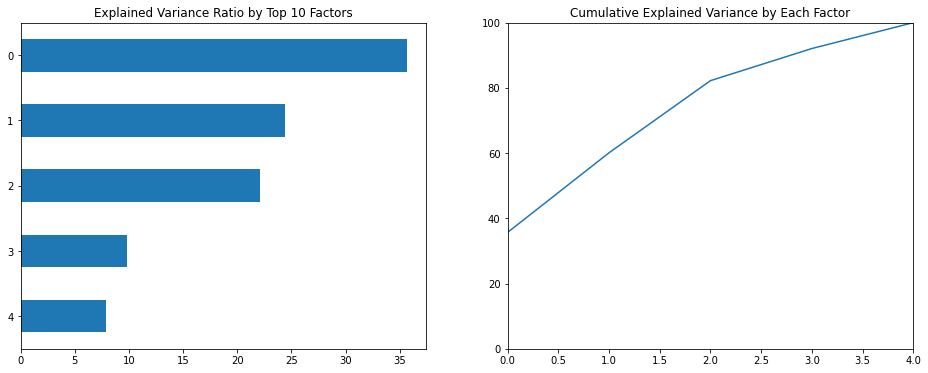

In [25]:
fig, axes = plt.subplots(ncols = 2,
                         figsize = (16, 6)
                         )

Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]
                   ).sort_values() * 100

Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]
                   ).cumsum()*100

Series1.plot.barh(ylim = (0, 9),
                  title = "Explained Variance Ratio by Top 10 Factors",
                  ax = axes[0]
                  );

Series2.plot(ylim = (0, 100),
             xlim = (0, NumEigenvalues-1),
             ax = axes[1],
             title = "Cumulative Explained Variance by Each Factor");

array([[<AxesSubplot:title={'center':'Portfolio 0'}>],
       [<AxesSubplot:title={'center':'Portfolio 1'}>],
       [<AxesSubplot:title={'center':'Portfolio 2'}>],
       [<AxesSubplot:title={'center':'Portfolio 3'}>],
       [<AxesSubplot:title={'center':'Portfolio 4'}>]], dtype=object)

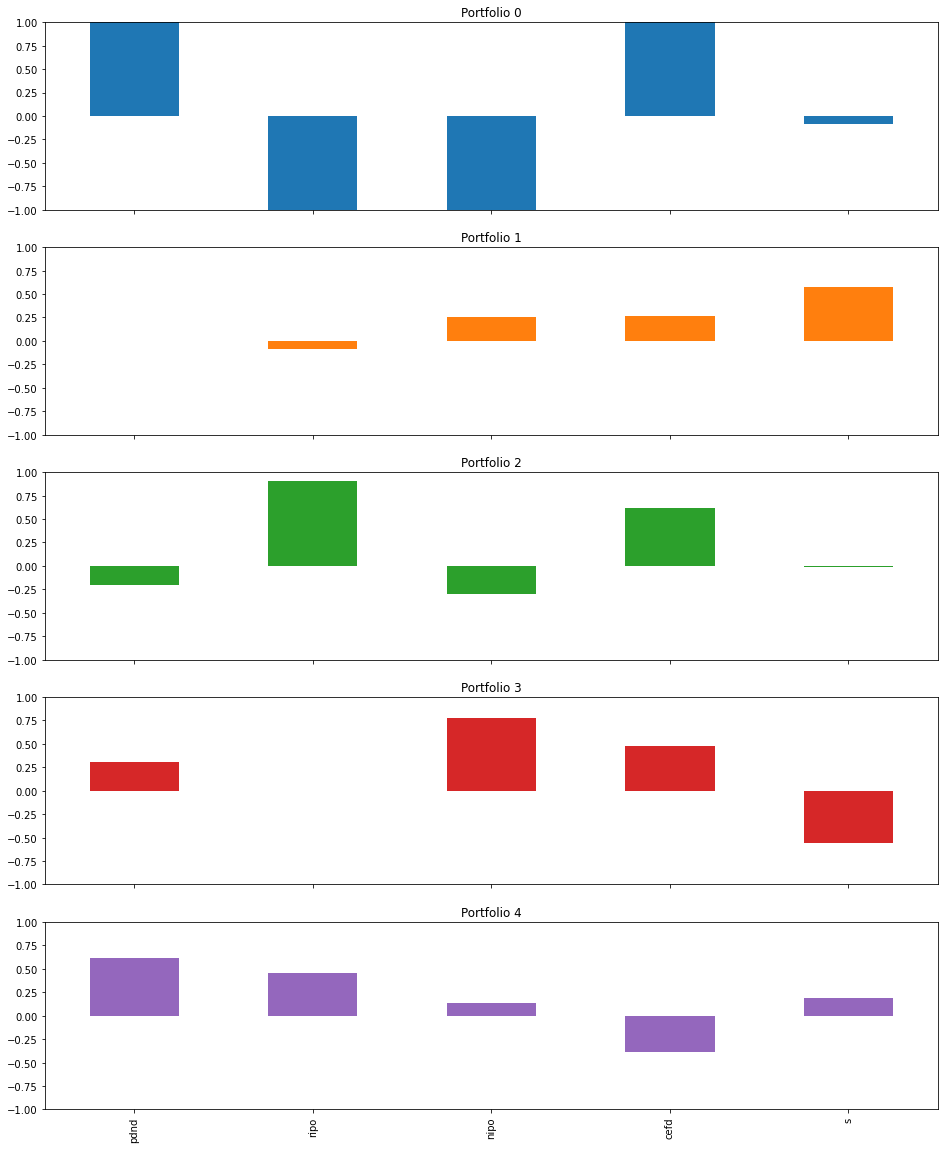

In [26]:
NumComponents = 5

topPortfolios = pd.DataFrame(pca.components_[:NumComponents],
                             columns = proxy.columns)

eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis = 0)

eigen_portfolios.index = [f"Portfolio {i}" for i in range( NumComponents)
                          ]

np.sqrt(pca.explained_variance_)

eigen_portfolios.T.plot.bar(subplots = True,
                            layout = (int(NumComponents), 1),
                            legend = False,
                            sharey = True,
                            ylim = (-1, 1),
                            figsize = (16, 20)
                           )

In [27]:
PrincipalComponent.components_[0]

array([-0.64348867,  0.33358927,  0.53419006, -0.43474136,  0.01677685])

In [28]:
scaler = StandardScaler()
scaled_x_test = scaler.fit_transform(x_test)

In [29]:
pca_x_train = pca.transform(scaled_x_train)[:,0]
pca_x_test = pca.transform(scaled_x_test)[:,0]
pca_x = np.hstack([pca_x_train,pca_x_test])[1:]
pca_x.shape

(656,)

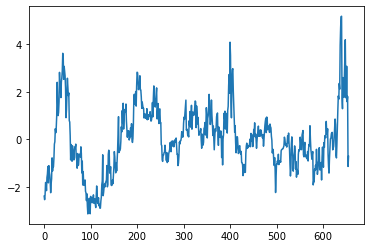

In [30]:
plt.plot(pca_x)

# PLS

In [31]:
comb['ret'] = comb['PX_LAST'].pct_change()
comb.head()

,PX_LAST,year,month,date,pdnd,ripo,nipo,cefd,s,ret
196507,85.25,1965.0,7.0,196507,26.450001,35.299999,8.0,19.270000,0.14,NaN
196508,87.17,1965.0,8.0,196508,24.730000,28.000000,8.0,19.690001,0.14,0.022522
196509,89.96,1965.0,9.0,196509,23.170000,-5.300000,17.0,17.580000,0.14,0.032006
196510,92.42,1965.0,10.0,196510,21.010000,-4.400000,11.0,13.590000,0.13,0.027345
196511,91.61,1965.0,11.0,196511,16.129999,1.500000,20.0,13.960000,0.14,-0.008764


In [32]:
y_train = comb.iloc[1:num_train, -1] * 100
print(y_train.shape)
y_test = comb.iloc[num_train:, -1] * 100
print(y_test.shape)

(525,)
(131,)


In [33]:
pls = PLSRegression(n_components=1)
pls.fit(x_train[1:], y_train)

PLSRegression(n_components=1)

In [34]:
pls_x = np.vstack([pls.predict(x_train[1:]), pls.predict(x_test)])

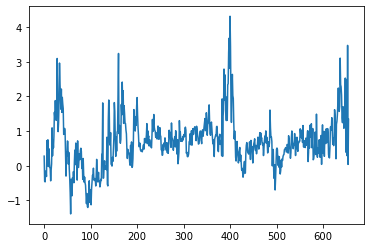

In [35]:
plt.plot(pls_x)

# AE (Benchmark, Fix, Keras Sequential)

In [36]:
# keras AE example (fix model)
latent_size = 1
input_size = 5

# Encoder
enc_input = Input(shape=(input_size,))
enc_dense1 = Dense(units=5, activation='tanh')(enc_input)
enc_dense2 = Dense(units=3, activation='tanh')(enc_dense1)
enc_dense3 = Dense(units=latent_size)(enc_dense2)
encoder = Model(enc_input, enc_dense3)

print(encoder.summary())


encoder.compile(optimizer="adam", loss="mse")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


2022-12-14 15:45:35.067440: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
encoder.compile(optimizer="adam", loss="mse")
history = encoder.fit(scaled_x_train, scaled_x_train, epochs=100,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/100
14/14 [==============================] - 1s 13ms/step - loss: 1.2648 - val_loss: 0.4238
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 1.2089 - val_loss: 0.4031
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 1.1622 - val_loss: 0.3868
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 1.1238 - val_loss: 0.3734
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 1.0936 - val_loss: 0.3653
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 1.0700 - val_loss: 0.3588
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 1.0502 - val_loss: 0.3541
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 1.0346 - val_loss: 0.3505
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 1.0218 - val_loss: 0.3486
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 1.0115 - val_loss: 0.3474
Epoch 11

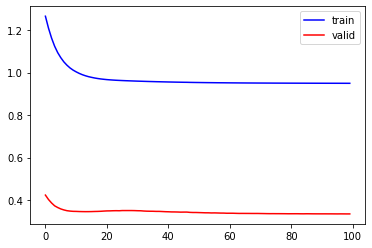

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(len(loss)), loss, 'b-', label='train')
plt.plot(range(len(loss)), val_loss, 'r-', label='valid')
plt.legend(loc='best')
plt.show()

In [39]:
ae_x_test = encoder.predict(scaled_x_test)
ae_x_train = encoder.predict(scaled_x_train)
ae_x_bench = np.vstack([ae_x_train,ae_x_test])

17/17 [==============================] - 0s 733us/step


In [40]:
# model = keras.Sequential()
# model.add(Dense(5, input_shape=(scaled_x.shape[1],1)))
# # model.add(LSTM(32, input_shape=(x_train.shape[1],x_train.shape[2]),return_sequences=True))
# model.add(Dense(3))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [41]:
# history = model.fit(scaled_x, scaled_x, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

In [42]:
# plt.plot(history.history['loss'],c='blue', label='train')    
# plt.plot(history.history['val_loss'],c='red', label='valid') 
# plt.ylim(0,0.0000000000002)
# plt.legend()
# plt.show()

In [43]:
# ae_x = model.predict(scaled_x)

# AE (Grid search)

In [45]:
from keras.optimizers import Adam

In [46]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# define the autoencoder architecture and the hyperparameters to optimize
def build_model(activation="relu", learning_rate=1e-3):
    model = Sequential()

    # add the specified number of layers and neurons to the model
    model.add(Dense(5, input_dim=5, activation=activation))
    model.add(Dense(3, activation=activation))
    model.add(Dense(1, activation=activation))

    # compile the model with the specified learning rate
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss="mse")

    return model


# define the grid of hyperparameters to search
param_grid = {
    "activation": ["relu", "tanh", "sigmoid"],
    "learning_rate": [1e-3, 1e-2, 1e-1]
}

# create a KerasClassifier object that wraps the autoencoder model
model = KerasRegressor(build_fn=build_model, epochs=100, batch_size=32, verbose=0)

# use grid search to find the best set of hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid.fit(scaled_x_train, scaled_x_train)

# print the best set of hyperparameters found by grid search
print(grid.best_params_)


2022-12-14 15:45:43.615264: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 15:45:43.615287: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 15:45:43.615333: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

{'activation': 'tanh', 'learning_rate': 0.1}


In [47]:
ae_1 = build_model(activation=grid.best_params_['activation'],
                    learning_rate = grid.best_params_['learning_rate']
                    )

ae_1.fit(scaled_x_train, scaled_x_train)

ae_1_x_train = ae_1.predict(scaled_x_train)
ae_1_x_test = ae_1.predict(scaled_x_test)

ae_x_grid = np.vstack([ae_1_x_train, ae_1_x_test])


5/5 [==============================] - 0s 875us/step


In [48]:
ae_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 30        
                                                                 
 dense_7 (Dense)             (None, 3)                 18        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


# Compare

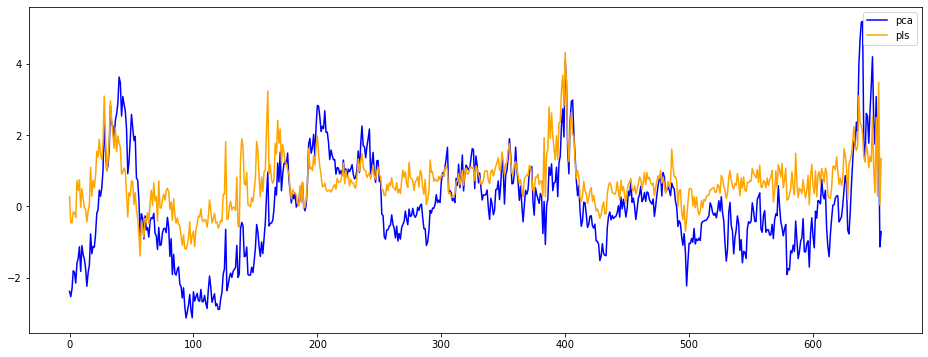

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

plt.plot(pca_x, 
        label='pca',
        color='b'
        )

plt.plot(pls_x, 
        label='pls',
        color='orange'
        )

plt.legend()
plt.show()

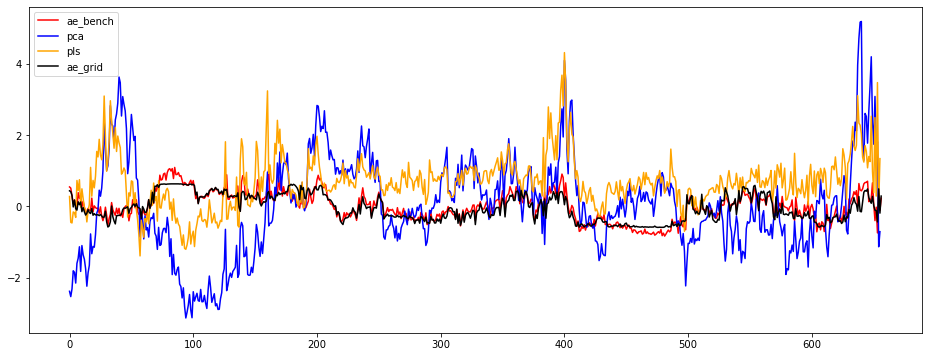

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)

plt.plot(ae_x_bench, 
        label='ae_bench',
        color='r'
        )

plt.plot(pca_x, 
        label='pca',
        color='b'
        )

plt.plot(pls_x, 
        label='pls',
        color='orange'
        )

plt.plot(ae_x_grid, 
        label='ae_grid',
        color='black'
        )

plt.legend()
plt.show()

In [87]:
x = pd.DataFrame()
x.index = comb.index[2:]
x['pca'] = pca_x[1:]
x['pls'] = pls_x[1:]
x['ae'] = ae_x_bench[2:]
x['ret'] = comb['ret'][2:] * 100
# x.dropna(inplace=True)

In [88]:
x

,pca,pls,ae,ret
196509,-2.533491,-0.450188,0.282314,3.200642
196510,-2.316871,-0.467349,0.073353,2.734549
196511,-1.809660,-0.158314,0.178593,-0.876434
196512,-1.852563,-0.180211,0.020697,0.895099
196601,-2.153616,-0.312168,-0.053668,0.486855
...,...,...,...,...
202202,3.081731,2.488267,-0.024405,-3.136052
202203,1.588364,0.286425,-0.746588,3.577324
202204,1.811164,3.471144,0.460531,-8.795672
202205,-1.136095,0.036508,-0.115365,0.005324


In [89]:
time_list = pd.date_range('9/1/1965','6/1/2022',freq='M')

In [90]:
time_list = pd.to_datetime(x.index, format='%Y%m')

In [91]:
x['ae1'] = ae_x_grid[2:]

In [92]:
# x.to_csv('pca_pls.csv')

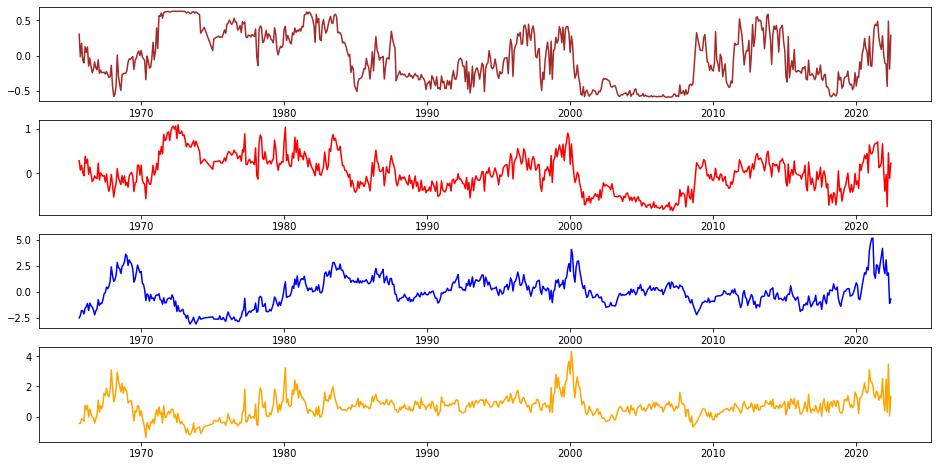

In [93]:
fig, axes = plt.subplots(4)
fig.set_size_inches(16, 8)

axes[0].plot(time_list,
        x['ae1'],
        label='ae_x_grid',
        color='brown'
        )

axes[1].plot(time_list, x['ae'],
        label='ae_bench',
        color='r'
        )

axes[2].plot(time_list, x['pca'] ,
        label='pca',
        color='b'
        )

axes[3].plot(time_list, x['pls'] ,
        label='pls',
        color='orange'
        )

plt.show()

In [94]:
x['ret'] = x['ret'].shift(1)
x.dropna(inplace=True)

In [95]:
y = x['ret']

In [96]:
x_pca = x['pca']

result_pca = sm.OLS(y, sm.add_constant(x_pca)).fit()
 
# printing the summary table
print(result_pca.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     9.810
Date:                Wed, 14 Dec 2022   Prob (F-statistic):            0.00181
Time:                        15:50:51   Log-Likelihood:                -1901.4
No. Observations:                 654   AIC:                             3807.
Df Residuals:                     652   BIC:                             3816.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6893      0.174      3.972      0.0

In [97]:
x_pls = x['pls']

result_pls = sm.OLS(y, sm.add_constant(x_pls)).fit()
 
# printing the summary table
print(result_pls.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     21.12
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           5.18e-06
Time:                        15:50:52   Log-Likelihood:                -1895.9
No. Observations:                 654   AIC:                             3796.
Df Residuals:                     652   BIC:                             3805.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0575      0.237     -0.242      0.8

In [98]:
x_ae = x['ae']

result_ae = sm.OLS(y, sm.add_constant(x_ae)).fit()
 
# printing the summary table
print(result_ae.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.751
Date:                Wed, 14 Dec 2022   Prob (F-statistic):             0.0532
Time:                        15:50:52   Log-Likelihood:                -1904.4
No. Observations:                 654   AIC:                             3813.
Df Residuals:                     652   BIC:                             3822.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6915      0.174      3.967      0.0

In [100]:
x_ae_1 = x['ae1']

result_ae = sm.OLS(y, sm.add_constant(x_ae_1)).fit()
 
# printing the summary table
print(result_ae.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.358
Date:                Wed, 14 Dec 2022   Prob (F-statistic):              0.244
Time:                        15:52:13   Log-Likelihood:                -1905.6
No. Observations:                 654   AIC:                             3815.
Df Residuals:                     652   BIC:                             3824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7195      0.176      4.088      0.0

In [69]:
x.describe()

,pca,pls,ae,ret,ae1
count,655.000000,655.000000,655.000000,655.000000,655.000000
mean,0.007184,0.687166,0.003090,0.679851,-0.045414
std,1.349169,0.726430,0.402426,4.477500,0.362949
min,-3.133222,-1.392139,-0.835770,-30.135716,-0.590865
25%,-0.804353,0.307729,-0.272477,-1.809095,-0.334534
50%,-0.056213,0.664586,-0.021010,0.940018,-0.093718
75%,0.827992,1.002627,0.268726,3.516185,0.276159
max,5.185479,4.311841,1.090214,18.735121,0.629199


In [73]:

x['monthdate'] = comb.index[:-2]
x = x.set_index(['monthdate'])
x

,pca,pls,ae,ret,ae1
monthdate,,,,,
196507,-2.533491,-0.450188,0.282314,NaN,0.303317
196508,-2.316871,-0.467349,0.073353,3.200642,-0.018296
196509,-1.809660,-0.158314,0.178593,2.734549,0.174522
196510,-1.852563,-0.180211,0.020697,-0.876434,-0.067002
196511,-2.153616,-0.312168,-0.053668,0.895099,-0.105942
...,...,...,...,...,...
202112,3.081731,2.488267,-0.024405,-5.258509,-0.120621
202201,1.588364,0.286425,-0.746588,-3.136052,-0.438632
202202,1.811164,3.471144,0.460531,3.577324,0.489005


In [74]:
x.to_csv('market_sentiment_1.csv')